Алиева Хадижат ПИ20-1. Лабораторная работа 5.2. Обработка данных для машинного обучения

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

In [2]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
#портим исходный датасет
for col in df.columns:
     df.loc[df.sample(frac=0.2).index, col] = np.nan
df.dtypes

step              float64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [4]:
df.shape

(165439, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165439 entries, 0 to 165438
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            132351 non-null  float64
 1   type            132351 non-null  object 
 2   amount          132351 non-null  float64
 3   nameOrig        132351 non-null  object 
 4   oldbalanceOrg   132351 non-null  float64
 5   newbalanceOrig  132351 non-null  float64
 6   nameDest        132351 non-null  object 
 7   oldbalanceDest  132350 non-null  float64
 8   newbalanceDest  132350 non-null  float64
 9   isFraud         132351 non-null  float64
 10  isFlaggedFraud  132350 non-null  float64
dtypes: float64(8), object(3)
memory usage: 13.9+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,132351.000000,1.323510e+05,1.323510e+05,1.323510e+05,1.323500e+05,1.323500e+05,132351.000000,132350.0
mean,9.553755,1.789463e+05,8.843841e+05,9.089163e+05,9.222331e+05,1.186483e+06,0.000846,0.0
std,1.964766,3.355116e+05,2.803693e+06,2.864330e+06,2.369845e+06,2.685071e+06,0.029078,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.139611e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.344016e+04,1.944393e+04,0.000000e+00,3.816476e+04,1.076179e+05,0.000000,0.0
75%,11.000000,2.246463e+05,1.891210e+05,2.238015e+05,7.141691e+05,1.145435e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.856340e+07,3.894623e+07,3.894623e+07,3.904248e+07,1.000000,0.0


In [7]:
#Предметная область - банковские транзакции, датасет содержит данные о подозрительных банковских транзакциях
#Рассматирваемая задача является задачей бинарной классификации
#Целевая переменная - isFraud
set(df["isFraud"].unique())

{0.0, 1.0, nan}

In [8]:
#Работа с категориальными признаками
cat = [i for i in df.columns if df[i].dtypes == 'O']
cat

['type', 'nameOrig', 'nameDest']

In [9]:
for item in cat:
    print(f"{item} -> {len(set(df[item].unique()))}")

type -> 6
nameOrig -> 132350
nameDest -> 66969


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


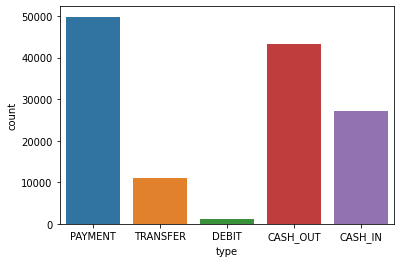

In [10]:
#Посмотрим на type
sns.countplot(df['type']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


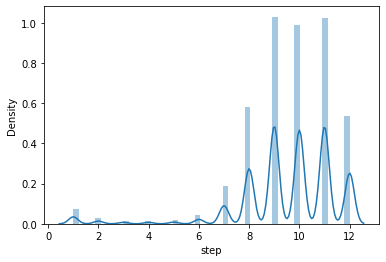

In [11]:
sns.distplot(df['step'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


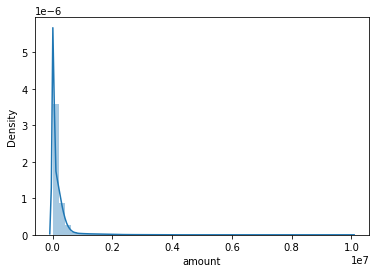

In [12]:
sns.distplot(df['amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


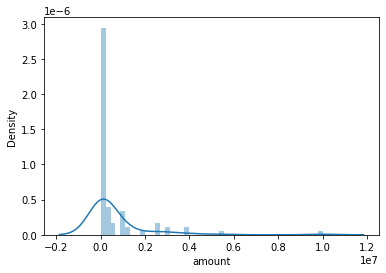

In [13]:
fraud = df[df['isFraud'] == 1]
sns.distplot(fraud['amount']);

In [14]:
df['isFraud'].value_counts()

0.0    132239
1.0       112
Name: isFraud, dtype: int64

In [15]:
num = [i for i in df.columns if df[i].dtypes != 'O']
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
исследование шкалы измерения каждого существенного признака;
построение эмпирического распределения каждого существенного признака;
анализ количества и распределения отсутствующих значений;
построение совместного распределения каждого признака и целевой переменной;
построение корреляционной матрицы.
4. По каждому пункту анализа необходимо сделать содержательный вывод.

In [17]:
#Исследование шкалы измерения каждого существенного признака
from typing import Tuple, Union

def scale_values_getter(value: pd.Series) -> Tuple[np.dtype, int, Union[int, str], Union[int, str], list]:

    uniq_values = sorted(value.dropna().unique())
    shape_value = len(uniq_values)
    min_value = pd.Series(uniq_values).dropna().min()
    max_value = pd.Series(uniq_values).dropna().max()
    
    #Если категориальный признак-строка - нет смысла искать max/min
    if value.dtype == object:
        min_value, max_value = "-"*2

    return value.dtype, shape_value, min_value, max_value, uniq_values

res = df.apply(scale_values_getter).transpose()
res.columns = ["type","shape","min_value", "max_value", "uniq_values"]
res

,type,shape,min_value,max_value,uniq_values
step,float64,12,1.0,12.0,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
type,object,5,-,-,"[CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER]"
amount,float64,131587,0.32,10000000.0,"[0.32, 0.89, 1.77, 2.39, 2.7, 3.21, 3.38, 3.75..."
nameOrig,object,132349,-,-,"[C1000012640, C1000028246, C1000037689, C10000..."
oldbalanceOrg,float64,73382,0.0,38563401.41,"[0.0, 1.0, 2.0, 3.0, 4.0, 4.58, 5.0, 6.0, 7.0,..."
newbalanceOrig,float64,61679,0.0,38946233.02,"[0.0, 1.63, 3.59, 4.58, 5.83, 9.64, 10.16, 13...."
nameDest,object,66968,-,-,"[C1000156006, C1000157415, C1000219612, C10004..."
oldbalanceDest,float64,72749,0.0,38946233.02,"[0.0, 1.0, 2.0, 3.11, 7.0, 8.0, 9.0, 10.0, 12...."
newbalanceDest,float64,35434,0.0,39042481.25,"[0.0, 3.11, 12.82, 24.16, 33.12, 71.51, 71.92,..."
isFraud,float64,2,0.0,1.0,"[0.0, 1.0]"


In [18]:
#Построение эмпирического распределения каждого существенного признака
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

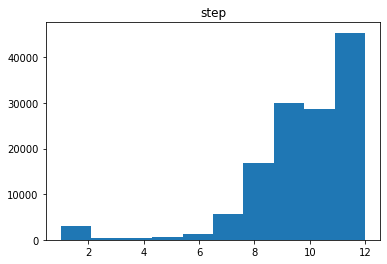

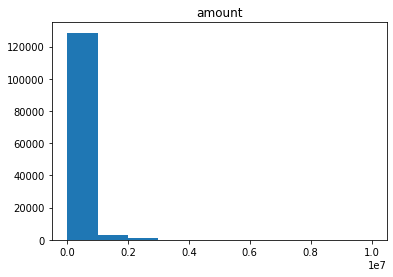

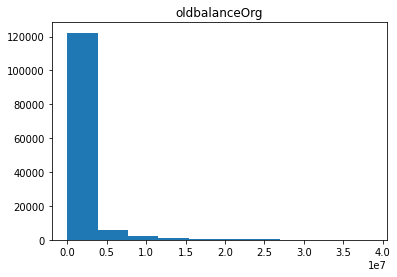

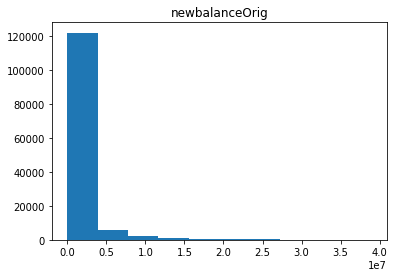

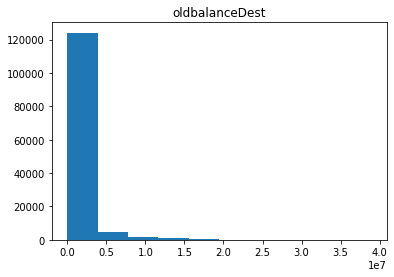

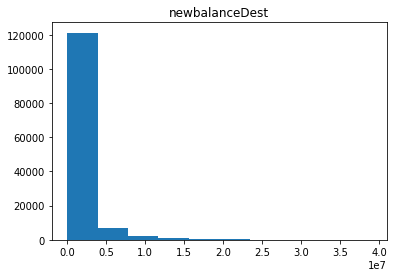

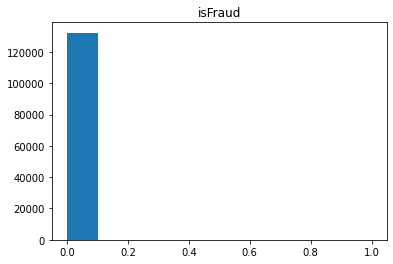

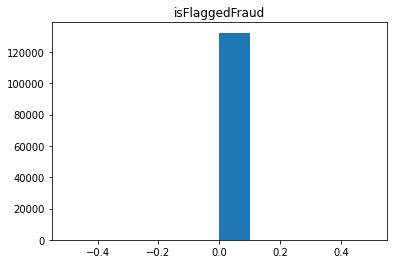

In [20]:
for column in num:
    plt.hist(df[column])
    plt.title(column)
    plt.show()
#step хоть как-то близок к нормальному распределнию, в остальном - ничего

In [21]:
#Анализ количества и распределения отсутствующих значений
df.shape

(165439, 11)

In [22]:
full_series = df.dropna().count()
full_series

step              14236
type              14236
amount            14236
nameOrig          14236
oldbalanceOrg     14236
newbalanceOrig    14236
nameDest          14236
oldbalanceDest    14236
newbalanceDest    14236
isFraud           14236
isFlaggedFraud    14236
dtype: int64

In [23]:
#Построение совместного распределения каждого признака и целевой переменной
grouped_df = pd.DataFrame(df.groupby(['isFraud']).count())
grouped_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0.0,105821,105667,105698,105806,105943,105853,105849,105753,105823,105720
1.0,88,88,81,92,87,90,92,94,94,97


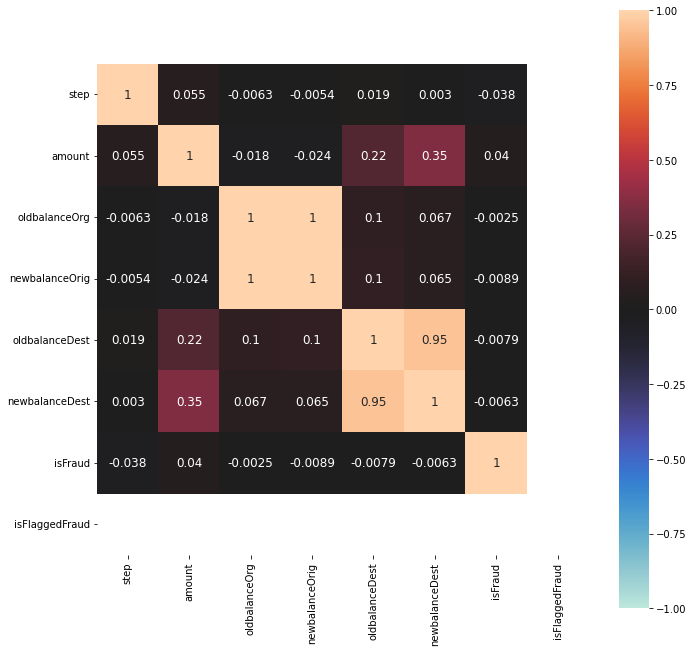

In [25]:
#Построение корреляционной матрицы
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)
#Для целевой переменной isFraud особых корреляций от отдельного фактора не выявлено

5. Провести подготовительную обработку данных, включающую следующие шаги: 6. удаление или заполнение отсутствующих значений; 7. приведение всех признаков к бинарной либо числовой шкале; 8. удаление несущественных либо избыточных признаков; 9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

In [26]:
#Заполнение отсутствующих значений
fixed_df = df.copy()
fixed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,NaN,NaN,160296.36,M1979787155,0.0,NaN,0.0,NaN
1,1.0,PAYMENT,1864.28,NaN,21249.0,19384.72,M2044282225,NaN,0.0,0.0,NaN
2,1.0,NaN,181.00,C1305486145,NaN,NaN,C553264065,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,C840083671,NaN,0.00,C38997010,21182.0,0.0,1.0,NaN
4,NaN,PAYMENT,11668.14,NaN,41554.0,NaN,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
165434,12.0,PAYMENT,4149.07,C2001802076,NaN,0.00,M1708280162,0.0,0.0,NaN,NaN
165435,12.0,PAYMENT,20934.94,C150264052,0.0,0.00,M806755072,0.0,0.0,0.0,0.0
165436,NaN,CASH_OUT,122832.41,C1327637933,23958.0,0.00,C475670359,11507.0,NaN,0.0,0.0
165437,12.0,CASH_IN,424626.95,C944569458,NaN,483598.95,NaN,0.0,NaN,0.0,0.0


Общий алгоритм:

Если фактор категориальный, то ставим значение моды по нему (в случае type)

Если фактор числовой и ассиметрия достаточно большая, то можно взять среднее

Если фактор числовой и ассиметрия не очень большая, то можно взять медиану

Так как выборка достаточно большая, есть возможность удалить некоторые отсутствующие данные

In [28]:
#Для step возьмем предыдущее значение
fixed_df["step"].fillna(method='ffill', inplace=True)
#Для type выозьмем моду
fixed_df["type"].fillna(fixed_df["type"].mode(), inplace=True)
#Для oldbalanceOrg newbalanceOrig, amount, oldbalanceDest, newbalanceDest данные восстанавливаем по связанным полям
def money_fix(series):
    if not np.isnan(series["oldbalanceOrg"]) and not np.isnan(series["newbalanceOrig"]) and np.isnan(series["amount"]):
        amount = abs(series["oldbalanceOrg"]-series["newbalanceOrig"])
        series["amount"] = amount    
    return series

fixed_df = fixed_df.apply(money_fix, axis=1)

# Все остальное удаляем т.к. выборка большая
fixed_df = fixed_df.dropna()

In [29]:
#Все категориальные признаки меняем на числовые
fixed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
18,1.0,PAYMENT,671.64,C2033524545,15123.00,14451.36,M473053293,0.00,0.00,0.0,0.0
19,1.0,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0.0,0.0
24,1.0,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0.0,0.0
27,1.0,PAYMENT,8009.09,C1053967012,10968.00,2958.91,M295304806,0.00,0.00,0.0,0.0
29,1.0,PAYMENT,9920.52,C764826684,0.00,0.00,M1940055334,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
165396,12.0,CASH_IN,46123.86,C108542144,800.00,46923.86,C1201831265,717302.25,600051.45,0.0,0.0
165416,12.0,CASH_IN,135100.50,C189169392,1916873.99,2051974.48,C317767095,12332393.85,14239265.75,0.0,0.0
165430,12.0,PAYMENT,5588.68,C711155327,30195.00,24606.32,M1288904820,0.00,0.00,0.0,0.0
165431,12.0,PAYMENT,23464.82,C2021926784,24606.32,1141.50,M1759082195,0.00,0.00,0.0,0.0


In [30]:
fixed_df['nameOrig'] = fixed_df['nameOrig'].str[1:]
fixed_df['nameDest'] = fixed_df['nameDest'].str[1:]
fixed_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
18,1.0,PAYMENT,671.64,2033524545,15123.00,14451.36,473053293,0.00,0.00,0.0,0.0
19,1.0,TRANSFER,215310.30,1670993182,705.00,0.00,1100439041,22425.00,0.00,0.0,0.0
24,1.0,TRANSFER,311685.89,1984094095,10835.00,0.00,932583850,6267.00,2719172.89,0.0,0.0
27,1.0,PAYMENT,8009.09,1053967012,10968.00,2958.91,295304806,0.00,0.00,0.0,0.0
29,1.0,PAYMENT,9920.52,764826684,0.00,0.00,1940055334,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
165396,12.0,CASH_IN,46123.86,108542144,800.00,46923.86,1201831265,717302.25,600051.45,0.0,0.0
165416,12.0,CASH_IN,135100.50,189169392,1916873.99,2051974.48,317767095,12332393.85,14239265.75,0.0,0.0
165430,12.0,PAYMENT,5588.68,711155327,30195.00,24606.32,1288904820,0.00,0.00,0.0,0.0
165431,12.0,PAYMENT,23464.82,2021926784,24606.32,1141.50,1759082195,0.00,0.00,0.0,0.0


In [31]:
types = pd.get_dummies(fixed_df['type'], prefix='type', drop_first=True)
types

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
18,0,0,1,0
19,0,0,0,1
24,0,0,0,1
27,0,0,1,0
29,0,0,1,0
...,...,...,...,...
165396,0,0,0,0
165416,0,0,0,0
165430,0,0,1,0
165431,0,0,1,0


In [32]:
fixed_df = pd.concat([types, fixed_df], axis=1)
fixed_df = fixed_df.drop('type', axis=1)
fixed_df

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
18,0,0,1,0,1.0,671.64,2033524545,15123.00,14451.36,473053293,0.00,0.00,0.0,0.0
19,0,0,0,1,1.0,215310.30,1670993182,705.00,0.00,1100439041,22425.00,0.00,0.0,0.0
24,0,0,0,1,1.0,311685.89,1984094095,10835.00,0.00,932583850,6267.00,2719172.89,0.0,0.0
27,0,0,1,0,1.0,8009.09,1053967012,10968.00,2958.91,295304806,0.00,0.00,0.0,0.0
29,0,0,1,0,1.0,9920.52,764826684,0.00,0.00,1940055334,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165396,0,0,0,0,12.0,46123.86,108542144,800.00,46923.86,1201831265,717302.25,600051.45,0.0,0.0
165416,0,0,0,0,12.0,135100.50,189169392,1916873.99,2051974.48,317767095,12332393.85,14239265.75,0.0,0.0
165430,0,0,1,0,12.0,5588.68,711155327,30195.00,24606.32,1288904820,0.00,0.00,0.0,0.0
165431,0,0,1,0,12.0,23464.82,2021926784,24606.32,1141.50,1759082195,0.00,0.00,0.0,0.0


In [33]:
#Формируем X и Y для дальнейшей передачи sklearn.model_selection.train_test_split
X = fixed_df.drop('isFraud', axis=1)
y = fixed_df['isFraud']

6. Количественные характеристики датасета необходимо также привести после его обработки.

In [34]:
fixed_df.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
18,0,0,1,0,1.0,671.64,2033524545,15123.0,14451.36,473053293,0.0,0.00,0.0,0.0
19,0,0,0,1,1.0,215310.30,1670993182,705.0,0.00,1100439041,22425.0,0.00,0.0,0.0
24,0,0,0,1,1.0,311685.89,1984094095,10835.0,0.00,932583850,6267.0,2719172.89,0.0,0.0
27,0,0,1,0,1.0,8009.09,1053967012,10968.0,2958.91,295304806,0.0,0.00,0.0,0.0
29,0,0,1,0,1.0,9920.52,764826684,0.0,0.00,1940055334,0.0,0.00,0.0,0.0


In [35]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22232 entries, 18 to 165435
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type_CASH_OUT   22232 non-null  uint8  
 1   type_DEBIT      22232 non-null  uint8  
 2   type_PAYMENT    22232 non-null  uint8  
 3   type_TRANSFER   22232 non-null  uint8  
 4   step            22232 non-null  float64
 5   amount          22232 non-null  float64
 6   nameOrig        22232 non-null  object 
 7   oldbalanceOrg   22232 non-null  float64
 8   newbalanceOrig  22232 non-null  float64
 9   nameDest        22232 non-null  object 
 10  oldbalanceDest  22232 non-null  float64
 11  newbalanceDest  22232 non-null  float64
 12  isFraud         22232 non-null  float64
 13  isFlaggedFraud  22232 non-null  float64
dtypes: float64(8), object(2), uint8(4)
memory usage: 2.0+ MB


In [36]:
fixed_df.shape

(22232, 14)

In [37]:
fixed_df.describe()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,22232.000000,22232.000000,22232.000000,22232.000000,22232.000000,2.223200e+04,2.223200e+04,2.223200e+04,2.223200e+04,2.223200e+04,22232.000000,22232.0
mean,0.324667,0.008861,0.377969,0.085013,9.553212,1.571584e+05,8.891672e+05,9.068287e+05,9.441975e+05,1.212973e+06,0.000945,0.0
std,0.468261,0.093718,0.484891,0.278907,1.955410,3.198861e+05,2.878696e+06,2.916093e+06,2.389337e+06,2.710775e+06,0.030720,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,9.000000,7.763535e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,10.000000,3.658717e+04,1.932413e+04,0.000000e+00,3.562374e+04,1.015991e+05,0.000000,0.0
75%,1.000000,0.000000,1.000000,0.000000,11.000000,1.955463e+05,1.850454e+05,2.180355e+05,7.293135e+05,1.182923e+06,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,12.000000,4.435383e+06,3.816670e+07,3.825960e+07,3.410197e+07,3.439079e+07,1.000000,0.0
